In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Bitcoin_price_analysis/bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [3]:
df.shape

(1556, 7)

In [4]:
# Checking for missing values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [6]:
# Checking for duplicated values
df[df.duplicated()]

,Date,Open,High,Low,Close,Volume,Market Cap


In [7]:
# Checking if the correct data types are present
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1556,2015-06-14 12:00:00,2013-04-28 00:00:00,2014-05-21 18:00:00,2015-06-14 12:00:00,2016-07-07 06:00:00,2017-07-31 00:00:00,NaN
Open,1556.0,582.625328,68.5,254.2875,438.6,662.4375,2953.22,523.137312
High,1556.0,597.992847,74.56,260.3275,447.56,674.525,2999.91,542.992855
Low,1556.0,567.851446,65.53,248.835,430.57,646.735,2840.53,505.877401
Close,1556.0,584.239396,68.43,254.32,438.855,663.4025,2958.11,525.904442


In [10]:
%pip install chart-studio
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
df.index
df2=df.sort_index(ascending=False).reset_index()
df2.head()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


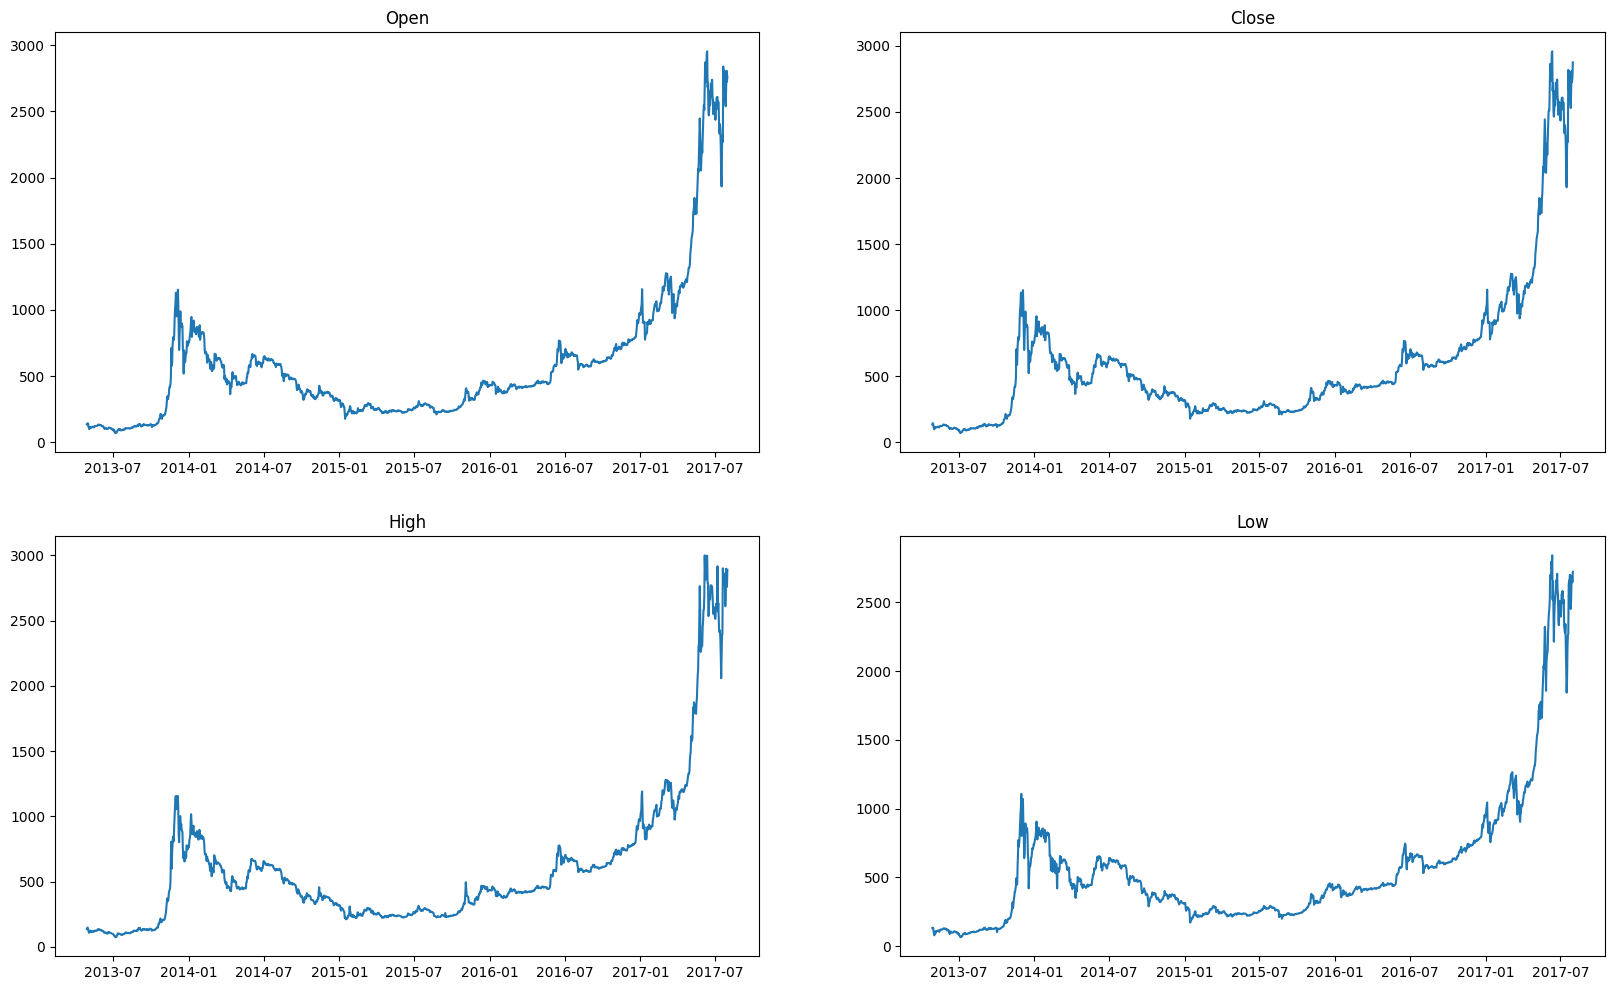

In [17]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open','Close','High','Low'],1):
    plt.subplot(2,2,index)
    plt.plot(df2['Date'],df2[col])
    plt.title(col)
plt.show()

In [18]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [19]:
init_notebook_mode(connected=True)

In [20]:
trace = go.Candlestick(x=df2['Date'] , 
            high =df2['High'] , 
            open = df2['Open'] , 
            close = df2['Close'] , 
            low = df2['Low'])

In [21]:
candle_data = [trace]
layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

In [24]:
fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [32]:
df2.set_index('Date' , inplace=True)
df2.drop(columns=['index'],inplace=True)
df2.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


<Axes: xlabel='Date'>

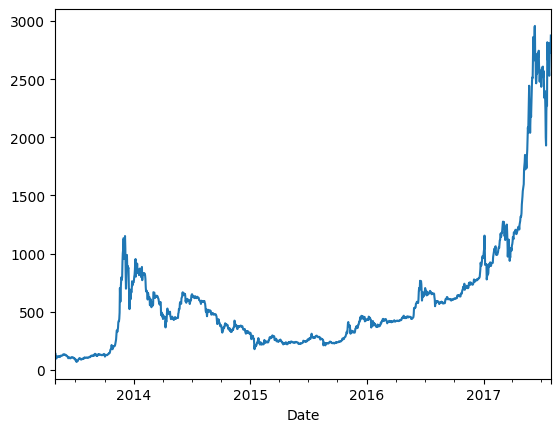

In [33]:
df2['Close'].plot()

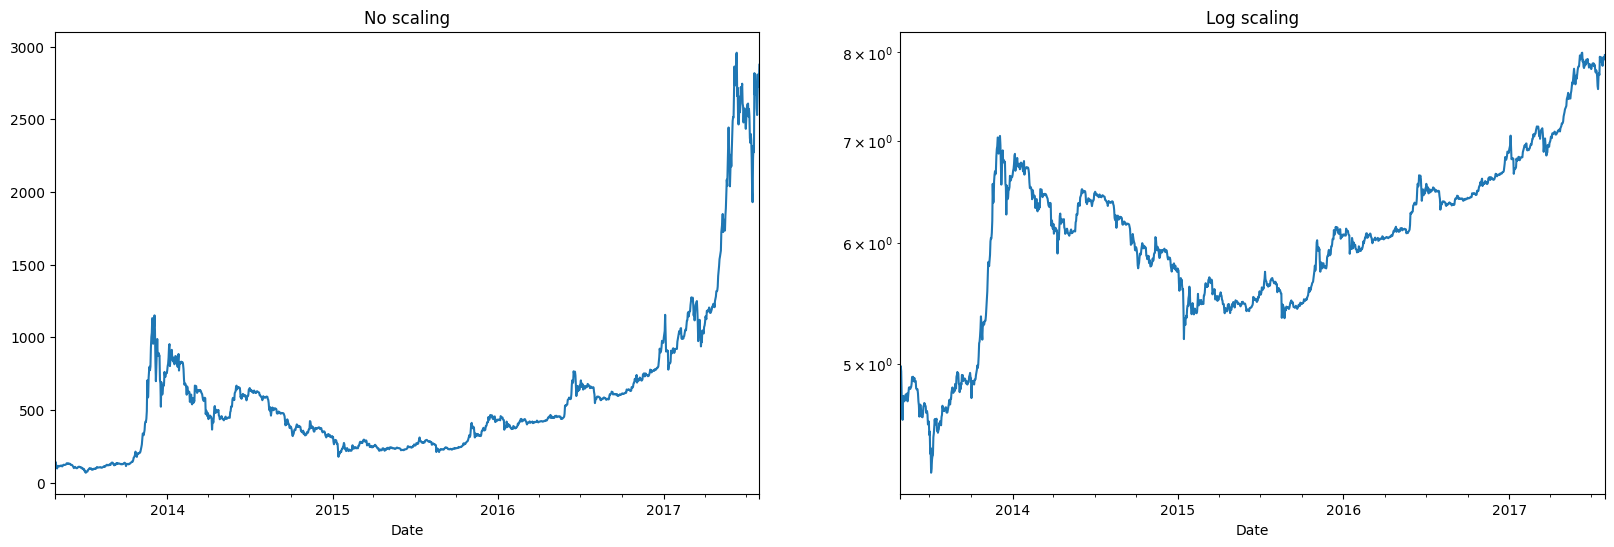

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
df2['Close'].plot()
plt.title('No scaling')
plt.subplot(1,2,2)
np.log1p(df2['Close']).plot()
'''
The np.log1p function in NumPy computes the natural logarithm (base e) of 1 + x 
for each element in the input array. 
This is mathematically equivalent to log(1 + x), where x is the input value.
'''
plt.title('Log scaling')
plt.yscale('log')

In [36]:
df2.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_1438/1373663385.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



"\ndf2['Close'].resample('Y').mean() does consider all the 'Close' prices within each year\nand calculates the average for each year.\n\nAs a result, you get a new Series or DataFrame (depending on the context) \nwhere each value represents the average 'Close' price for a specific year.\n"

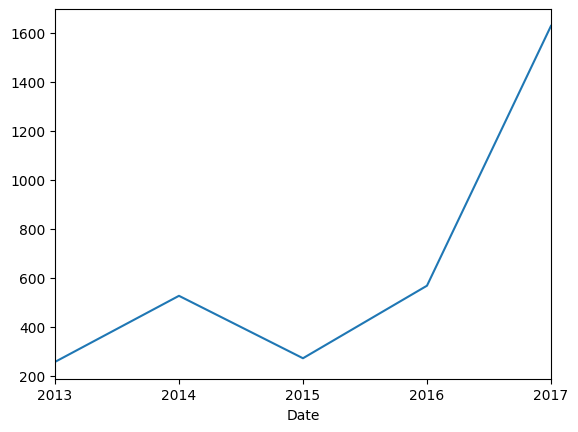

In [41]:
df2['Close'].resample('Y').mean().plot()
'''
df2['Close'].resample('Y').mean() does consider all the 'Close' prices within each year
and calculates the average for each year.

As a result, you get a new Series or DataFrame (depending on the context) 
where each value represents the average 'Close' price for a specific year.
'''

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_1438/3937261621.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Date'>

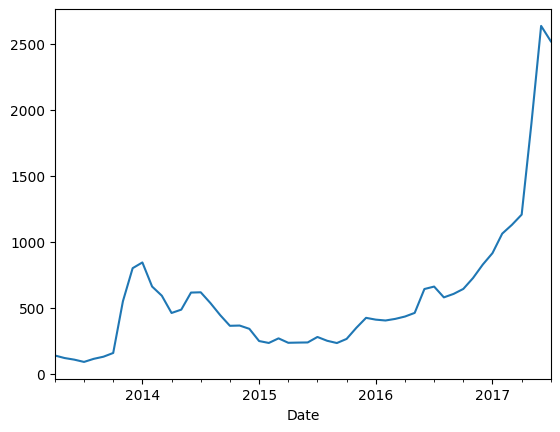

In [42]:
df2['Close'].resample('M').mean().plot()

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_1438/1747388635.py:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



<Axes: xlabel='Date'>

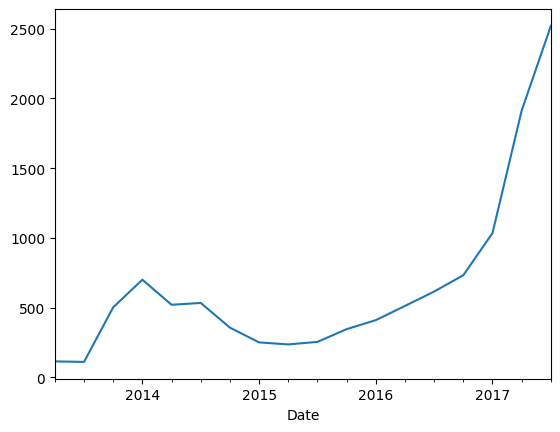

In [43]:
df2['Close'].resample('Q').mean().plot()

In [44]:
# Analyzing percentage change in closing stocks
df2['Daily return(in %)'] = df2['Close'].pct_change() * 100
df2.head()

,Open,High,Low,Close,Volume,Market Cap,Daily return(in %)
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",7.696893
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",-3.832849
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",-15.834532
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",-10.069237


In [47]:
df2=df2.reset_index()
df2.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Daily return(in %)
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",NaN
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",7.696893
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",-3.832849
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",-15.834532
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",-10.069237


In [48]:
import plotly.express as px
px.line(df2 , x="Date" , y="Daily return(in %)") 